### Load some data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("candy_production.csv",index_col=0)

In [3]:
data.columns

Index(['IPG3113N'], dtype='object')

In [4]:
data

,IPG3113N
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100
...,...
2017-04-01,107.4288
2017-05-01,101.9209
2017-06-01,104.2022


In [5]:
data.isna().sum()

IPG3113N    0
dtype: int64

In [6]:
data.index = pd.to_datetime(data.index)

In [7]:
data

,IPG3113N
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100
...,...
2017-04-01,107.4288
2017-05-01,101.9209
2017-06-01,104.2022


In [8]:
data.index.freq = 'MS' # D - day, 

In [9]:
data

,IPG3113N
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100
...,...
2017-04-01,107.4288
2017-05-01,101.9209
2017-06-01,104.2022


In [10]:
data.columns = ['candy production']

In [11]:
data

,candy production
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100
...,...
2017-04-01,107.4288
2017-05-01,101.9209
2017-06-01,104.2022


<Axes: xlabel='observation_date'>

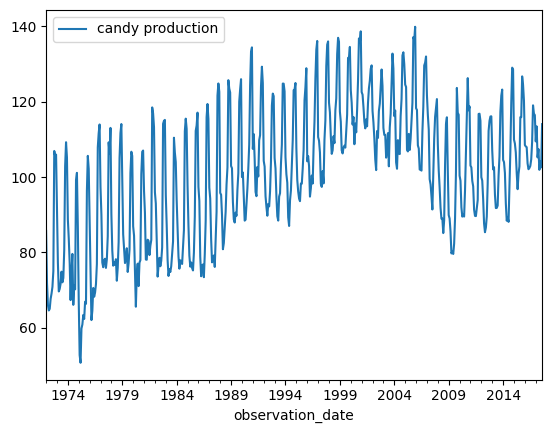

In [12]:
data.plot()

### Let's do some seasonal decompose

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [14]:
decomposition=seasonal_decompose(x=data,model='multiplicative')


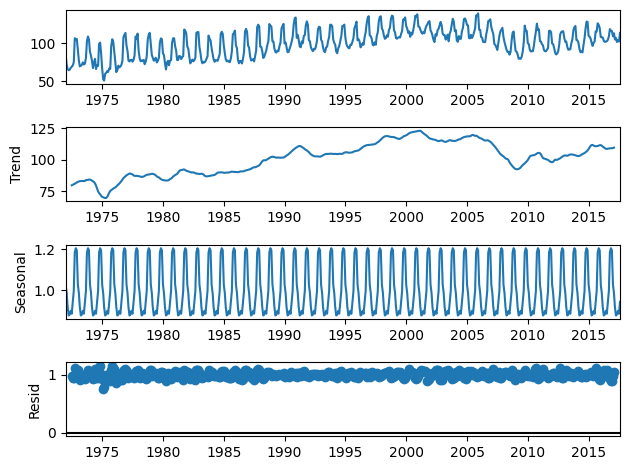

In [16]:
from matplotlib import pyplot as plt
decomposition.plot()
plt.show()

### Let's try the ARIMA model

In [ ]:
!pip install pmdarima

In [17]:
from pmdarima.arima import auto_arima

In [22]:
model = auto_arima(data, start_p=2, start_q=2,
                      test='adf',
                      max_p=5, max_q=5,
                      m=12,             
                      d=1,          
                      seasonal=True,   
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=2955.432, Time=4.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3177.330, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3067.080, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2969.534, Time=0.54 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=2960.282, Time=2.03 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=inf, Time=2.49 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=2956.153, Time=14.42 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=2956.787, Time=12.00 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=2954.852, Time=9.45 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=2951.313, Time=5.11 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2957.418, Time=2.11 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=2953.311, Time=8.51 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=2951.707, Time=5.74 sec
 ARIMA(0,1,2)(0,1,2)[12]   

In [23]:
model.aic()

2949.0610782291615

## Now split train and test

In [18]:
train = data.loc['1972-01-01':'2009-11-01']
test = data.loc['2009-12-01':]

In [19]:
train

,candy production
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100
...,...
2009-07-01,82.3126
2009-08-01,89.0494
2009-09-01,101.1519


In [22]:
test

,candy production
observation_date,
2009-12-01,116.5435
2010-01-01,100.3797
2010-02-01,99.0155
2010-03-01,91.9654
2010-04-01,89.4914
...,...
2017-04-01,107.4288
2017-05-01,101.9209
2017-06-01,104.2022


In [20]:
test.shape

(93, 1)

In [24]:
model.fit(train)

ARIMA(order=(2, 1, 3), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [25]:
# predict 93 steps ahead
prediction = model.predict(n_periods=len(test))

In [26]:
prediction

2009-12-01    111.691476
2010-01-01    100.437303
2010-02-01     98.503555
2010-03-01     91.240547
2010-04-01     87.245782
                 ...    
2017-04-01     76.409765
2017-05-01     74.075352
2017-06-01     73.835813
2017-07-01     74.723836
2017-08-01     79.710457
Freq: MS, Length: 93, dtype: float64

In [27]:
test

,candy production
observation_date,
2009-12-01,116.5435
2010-01-01,100.3797
2010-02-01,99.0155
2010-03-01,91.9654
2010-04-01,89.4914
...,...
2017-04-01,107.4288
2017-05-01,101.9209
2017-06-01,104.2022


In [28]:
prediction

2009-12-01    111.691476
2010-01-01    100.437303
2010-02-01     98.503555
2010-03-01     91.240547
2010-04-01     87.245782
                 ...    
2017-04-01     76.409765
2017-05-01     74.075352
2017-06-01     73.835813
2017-07-01     74.723836
2017-08-01     79.710457
Freq: MS, Length: 93, dtype: float64

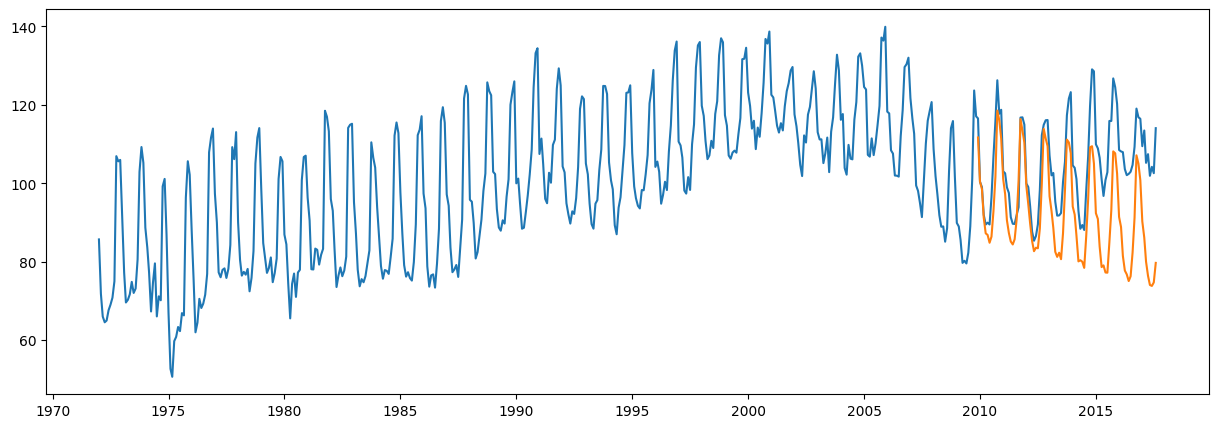

In [29]:
from matplotlib import pyplot as plt
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data)
ax.plot(prediction_series)


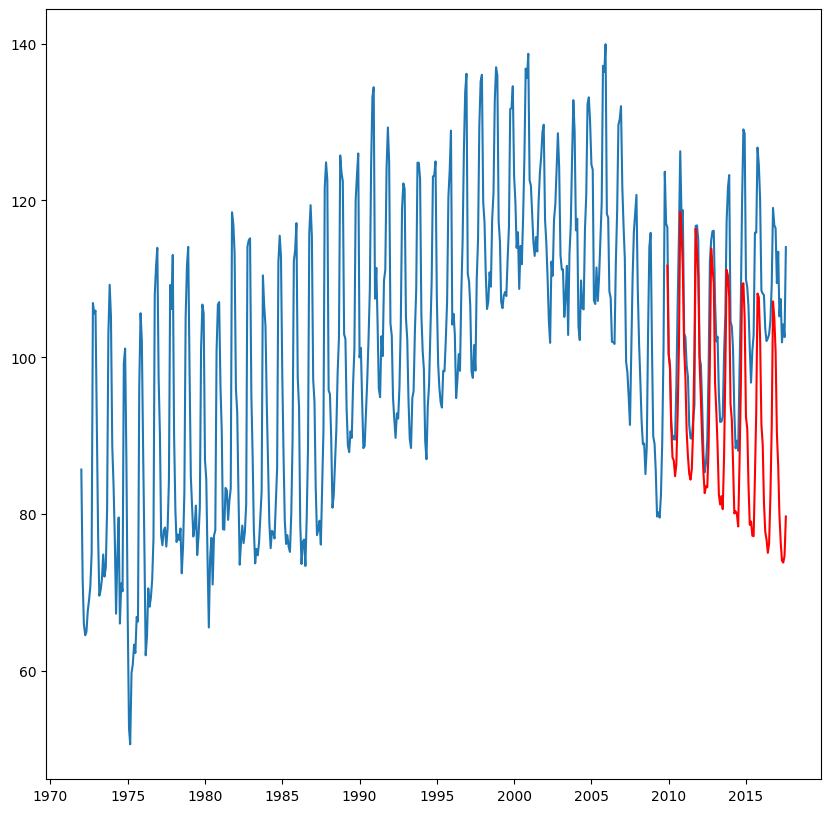

In [30]:
plt.figure(figsize=(10,10))
plt.plot(data,label='gt')
plt.plot(prediction_series,label='prediction',color='red')

In [37]:
prediction

2010-01-01    101.429777
2010-02-01     98.632439
2010-03-01     92.291034
2010-04-01     86.407989
2010-05-01     85.782775
                 ...    
2017-05-01     71.056717
2017-06-01     71.199024
2017-07-01     70.107547
2017-08-01     77.203866
2017-09-01     85.346185
Freq: MS, Length: 93, dtype: float64

### Prediction for next 12 months

In [31]:
prediction_new = model.predict(n_periods=len(test)+12)

In [32]:
prediction_new

2009-12-01    111.691476
2010-01-01    100.437303
2010-02-01     98.503555
2010-03-01     91.240547
2010-04-01     87.245782
                 ...    
2018-04-01     74.133359
2018-05-01     71.917093
2018-06-01     72.886219
2018-07-01     72.263646
2018-08-01     77.786391
Freq: MS, Length: 105, dtype: float64

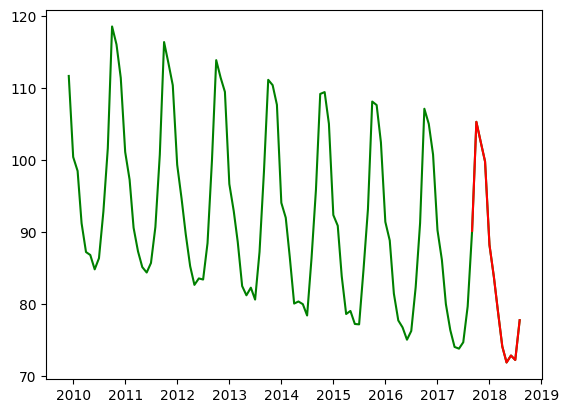

In [33]:
plt.plot(prediction_new,label='current pred',color='green')
plt.plot(prediction_new[len(test):],label='prediction for next 12 months',color='red')